# Univariate Time Series Prediction and Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


### Loading Dataset

In [2]:
# wrangle function
def wrangle(filepath):
    # Read csv file into Data Frame
    df = pd.read_csv(filepath)
    # Clean column names
    df = df.rename(columns=lambda x: x.strip().strip('"'))

    # Rename columns
    df['pilotstate'] = df['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'']
    df['loadcontrolgridimportexport-n'] = df['zappimode(1=FAST.2=ECO.3=ECO+)']
    df['zappimode'] = df[')']
    df['dsrdataload-n'] = df['loadcontrolgridimportexport']
    df['dsrdataseconds-n'] = df['dsrdataload']

    # Drop redundant columns
    df.drop(columns=['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'',
            'zappimode(1=FAST.2=ECO.3=ECO+)', 'loadcontrolgridimportexport', 'dsrdataload', 'dsrdataseconds', ')'], inplace=True)

    # Convert time format
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df = df.set_index('timestamp')
    return df

In [19]:
data = wrangle('./Data/chargerdata2_2023_06_10_Anonymized.csv')
data

,id,power,dsrloadcontrolactive,voltage,frequency,chargeenergy,pilotstate,loadcontrolgridimportexport-n,zappimode,dsrdataload-n,dsrdataseconds-n
timestamp,,,,,,,,,,,
2023-05-01 16:25:12,1,0,False,2389,4997,18.20,A,898,FAST,0,0
2023-05-01 16:25:12,2,0,False,2419,4994,36.53,A,-2219,FAST,0,0
2023-05-01 16:25:12,3,0,False,2408,4995,24.28,A,400,FAST,0,0
2023-05-01 16:25:12,4,0,False,2399,4988,17.44,A,-4,ECO_PLUS,0,0
2023-05-01 16:25:12,5,0,False,2385,4993,4.53,NaN,-4,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 16:25:12,33,0,False,2334,4995,18.97,A,420,FAST,0,0
2023-05-01 16:25:12,34,1148,False,2219,4995,1.21,C2,325,ECO_PLUS,0,0
2023-05-01 16:25:12,35,0,False,2376,4996,0.00,A,30,FAST,0,0


In [20]:
#Sorting data by index in ascending order
data.sort_index(inplace=True)
data.index

DatetimeIndex(['2023-02-05 23:43:51', '2023-02-05 23:43:51',
               '2023-02-05 23:43:51', '2023-02-05 23:43:51',
               '2023-02-05 23:43:51', '2023-02-05 23:43:51',
               '2023-02-05 23:43:51', '2023-02-05 23:43:51',
               '2023-02-05 23:43:51', '2023-02-05 23:43:51',
               ...
               '2023-06-11 06:38:24', '2023-06-11 06:38:24',
               '2023-06-11 06:38:24', '2023-06-11 06:38:24',
               '2023-06-11 06:38:24', '2023-06-11 06:38:24',
               '2023-06-11 06:38:24', '2023-06-11 06:38:24',
               '2023-06-11 06:38:24', '2023-06-11 06:38:24'],
              dtype='datetime64[ns]', name='timestamp', length=6297793, freq=None)

In [23]:
data

,id,power,dsrloadcontrolactive,voltage,frequency,chargeenergy,pilotstate,loadcontrolgridimportexport-n,zappimode,dsrdataload-n,dsrdataseconds-n
timestamp,,,,,,,,,,,
2023-02-05 23:43:51,26,1572,False,2380,4990,6.88,C2,-1011,ECO,1282,0
2023-02-05 23:43:51,15,0,False,2475,4996,0.00,A,611,FAST,0,0
2023-02-05 23:43:51,14,0,False,2443,4998,11.92,A,506,ECO_PLUS,0,0
2023-02-05 23:43:51,13,0,False,2374,4998,0.00,A,268,FAST,0,0
2023-02-05 23:43:51,12,7019,False,2256,4998,4.98,C2,8475,FAST,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11 06:38:24,3,0,False,2401,4991,10.44,A,-46,ECO_PLUS,0,0
2023-06-11 06:38:24,4,0,False,2447,4988,18.81,A,4,ECO_PLUS,0,0
2023-06-11 06:38:24,5,0,False,2399,4993,0.00,NaN,4,NaN,0,0


### Data Selection per id (ID: 26, 12, 9)

In [74]:
# Selecting data for only id 26
df26 = data[['power']][data.id == 26]

# Selecting data for only id 12
df12 = data[['power']][data.id == 12]

# Selecting data for only id 9
df9 = data[['power']][data.id == 9]

### Plots

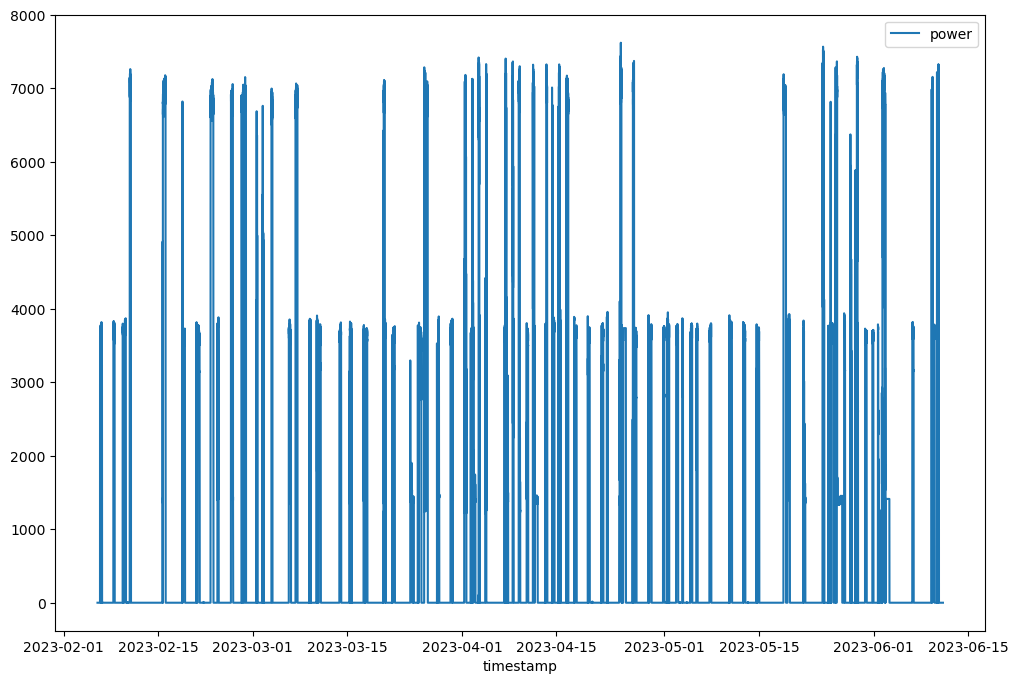

In [6]:
plt.figure(figsize=(12,8))
ax_9 = sns.lineplot(data=df9)

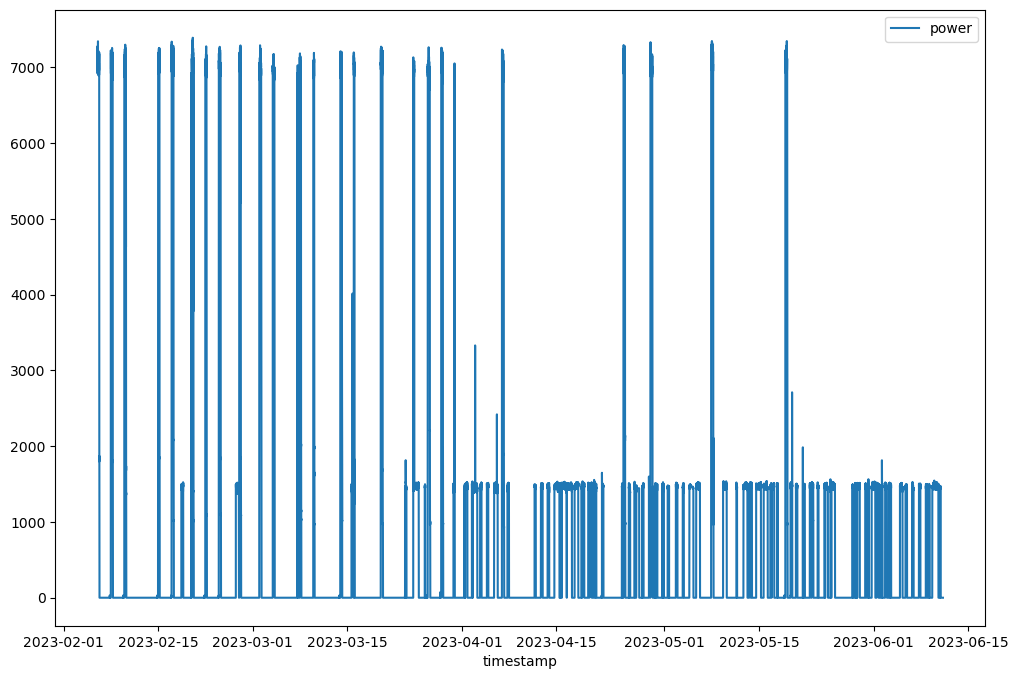

In [7]:
plt.figure(figsize=(12,8))
ax_12 = sns.lineplot(data=df12)

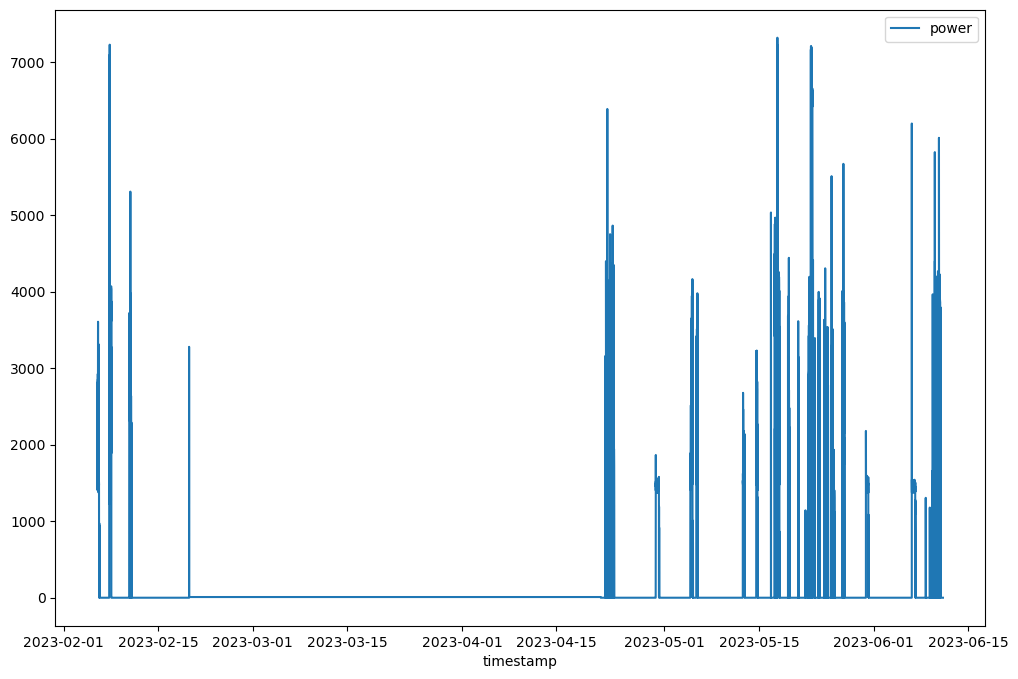

In [8]:
plt.figure(figsize=(12,8))
ax_26 = sns.lineplot(data=df26)

In [9]:
#Get axes for chosen charging station with ID = 12
axes = ax_12.get_xticklabels()

## Time Series Prediction - Time Resolution (24-hour time interval)

- Every datapoint here represents the average power consumption over a 24hr period

### Data Preproccessing

In [95]:
def data_preprocess(data, minute_interval='15T', split_ratio=0.7, initialize_scale=True, scaler=None):
    
    # Refactor to 15-min interval
    df_resampled = data.resample(minute_interval).mean()
  
    # Drop null values
    df_resampled.fillna(value=0, inplace=True)

    if initialize_scale:
        # Create an instance of new scaler if no scaler is provided
        scaler = MinMaxScaler()
        df_scaled = df_resampled.copy()
        df_scaled = scaler.fit_transform(df_resampled)
    else:
        # Use provided scaler object
        df_scaled = df_resampled.copy()
        df_scaled = scaler.fit_transform(df_resampled)

    # Splitting the dataset into train set and test set
    train_size = int(len(df_scaled) * split_ratio)
    train_data = df_scaled[:train_size] # Train set
    test_data = df_scaled[train_size:]  # Test set

    return train_data, test_data, df_scaled, df_resampled, scaler


### Time Series Prediction on id 12

In [96]:
train_data_12, test_data_12, df12_scaled, df12_resampled, scaler = data_preprocess(df12)
train_data_12.shape, test_data_12.shape

((8420, 2), (3609, 2))

### Creating Time series with previous observations

Highlight the reasons behind the feature selection; why 2days ago and not the last day. because the pattern is to charge every other day.



In [97]:
#df12['TimeStamp'] = pd.to_datetime(df12.index)
#df12['day_of_week'] = df12.index.dayofweek
df12

,power,TimeStamp,day_of_week
timestamp,,,
2023-02-05 23:43:51,7019,2023-02-05 23:43:51,6
2023-02-05 23:44:54,7040,2023-02-05 23:44:54,6
2023-02-05 23:45:57,7038,2023-02-05 23:45:57,6
2023-02-05 23:47:00,7037,2023-02-05 23:47:00,6
2023-02-05 23:48:03,6997,2023-02-05 23:48:03,6
...,...,...,...
2023-06-11 06:34:11,0,2023-06-11 06:34:11,6
2023-06-11 06:35:14,0,2023-06-11 06:35:14,6
2023-06-11 06:36:19,0,2023-06-11 06:36:19,6


In [88]:
import itertools


year_list = []
month_list = []
day_list = []
hour_list = []
minute_list = []
min_timeinterval = 15

for combination in itertools.product([2023],[2],[5],list(range(0,24)), [0,15,30,45]): # we define a dummy day 2022/01/01 but we are only interested in the time from 0h to 24h
        #print(combination) 
        year_list.append( combination[0] )
        month_list.append( combination[1] )
        day_list.append( combination[2] )
        hour_list.append( combination[3] )
        minute_list.append( combination[4] )


time_data = {'year':year_list,
                'month':month_list,
                'day':day_list,
                'hour':hour_list,
                'minute':minute_list,
                }

fullday_df = pd.DataFrame(data=time_data)

fullday_df['TimeStamp'] = pd.to_datetime( fullday_df[['year', 'month', 'day', 'hour', 'minute']])
fullday_df = fullday_df.drop(columns=['year', 'month', 'day', 'hour', 'minute'])
print(fullday_df)

             TimeStamp
0  2023-02-05 00:00:00
1  2023-02-05 00:15:00
2  2023-02-05 00:30:00
3  2023-02-05 00:45:00
4  2023-02-05 01:00:00
..                 ...
91 2023-02-05 22:45:00
92 2023-02-05 23:00:00
93 2023-02-05 23:15:00
94 2023-02-05 23:30:00
95 2023-02-05 23:45:00

[96 rows x 1 columns]


In [101]:
Power = df12['power'].to_numpy()

timearray = []
timearray = df12.index.to_numpy()
timearray_fullday = []
timearray_fullday = fullday_df['TimeStamp'].to_numpy()
Day_type = df12['day_of_week'].to_numpy()
print(df12['TimeStamp'])
print(timearray)
print(timearray_fullday)

timestamp
2023-02-05 23:43:51   2023-02-05 23:43:51
2023-02-05 23:44:54   2023-02-05 23:44:54
2023-02-05 23:45:57   2023-02-05 23:45:57
2023-02-05 23:47:00   2023-02-05 23:47:00
2023-02-05 23:48:03   2023-02-05 23:48:03
                              ...        
2023-06-11 06:34:11   2023-06-11 06:34:11
2023-06-11 06:35:14   2023-06-11 06:35:14
2023-06-11 06:36:19   2023-06-11 06:36:19
2023-06-11 06:37:21   2023-06-11 06:37:21
2023-06-11 06:38:24   2023-06-11 06:38:24
Name: TimeStamp, Length: 170837, dtype: datetime64[ns]
['2023-02-05T23:43:51.000000000' '2023-02-05T23:44:54.000000000'
 '2023-02-05T23:45:57.000000000' ... '2023-06-11T06:36:19.000000000'
 '2023-06-11T06:37:21.000000000' '2023-06-11T06:38:24.000000000']
['2023-02-05T00:00:00.000000000' '2023-02-05T00:15:00.000000000'
 '2023-02-05T00:30:00.000000000' '2023-02-05T00:45:00.000000000'
 '2023-02-05T01:00:00.000000000' '2023-02-05T01:15:00.000000000'
 '2023-02-05T01:30:00.000000000' '2023-02-05T01:45:00.000000000'
 '2023-02-05T

In [92]:
#df12 = df12.set_index('day_of_week')
df12

,power,TimeStamp,day_of_week
timestamp,,,
2023-02-05 23:43:51,7019,2023-02-05 23:43:51,6
2023-02-05 23:44:54,7040,2023-02-05 23:44:54,6
2023-02-05 23:45:57,7038,2023-02-05 23:45:57,6
2023-02-05 23:47:00,7037,2023-02-05 23:47:00,6
2023-02-05 23:48:03,6997,2023-02-05 23:48:03,6
...,...,...,...
2023-06-11 06:34:11,0,2023-06-11 06:34:11,6
2023-06-11 06:35:14,0,2023-06-11 06:35:14,6
2023-06-11 06:36:19,0,2023-06-11 06:36:19,6


In [103]:
# Function: Create time step for the dataset
# def create_dataset(dataset, time_step=4):
#     dataX, dataY = [], []

#     for i in range(len(dataset) - time_step):
        
#         # Extracting the required inputs
#         type_of_day = dataset[i + time_step - 1, 2]  # Assuming the type of day is the third column in the dataset
#         consumption_last_hour = dataset[i + time_step - 1, 1]  # Assuming consumption is the second column
#         #consumption_last_hour_prev_day = dataset[i + time_step - 1 - 96, 1]  # 96 steps back for the previous day
#         consumption_last_hour_2_days_before = dataset[i + time_step - 1 - 2*96, 1]  # 2 days before
        
#         # Combining the inputs
#         x = [type_of_day, consumption_last_hour, consumption_last_hour_prev_day, consumption_last_hour_2_days_before]
#         dataX.append(x)
#         dataY.append(dataset[i + time_step, 1])  # Assuming the target is the consumption

#     return np.array(dataX), np.array(dataY)


def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []

    for i in range(0, len(dataset)-time_step*2+1, time_step):
        a = dataset.iloc[i:(i+time_step),1]
        dataX.append(a)
        dataY.append(dataset.iloc[i + time_step:i+2*time_step, 1])

    return np.array(dataX), np.array(dataY)

In [84]:
print(train_data_12)

                        power  day_of_week
timestamp                                 
2023-02-05 23:30:00  0.968956          6.0
2023-02-05 23:45:00  0.964122          6.0
2023-02-06 00:00:00  0.975868          0.0
2023-02-06 00:15:00  0.981302          0.0
2023-02-06 00:30:00  0.986974          0.0
...                       ...          ...
2023-05-04 15:15:00  0.000000          3.0
2023-05-04 15:30:00  0.000000          3.0
2023-05-04 15:45:00  0.000000          3.0
2023-05-04 16:00:00  0.000000          3.0
2023-05-04 16:15:00  0.000000          3.0

[8420 rows x 2 columns]


In [102]:
time_step = 4

X_train, y_train = create_dataset(train_data_12, time_step=time_step)
X_test, y_test = create_dataset(test_data_12, time_step=time_step)

IndexError: index 2 is out of bounds for axis 1 with size 2

In [58]:
#X_train.shape, y_train.shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8131, 4) (8131,)
(3320, 4) (3320,)


#### Array Examination

In [57]:
# file_name = "train_data_12.txt"

 

# # Save the array to a text file

# with open(file_name, "w") as file:

#     for item in train_data_12:

#         file.write(str(item) + "\n")


# file_name = "Xtrain_data_12.txt"

 

# # Save the array to a text file

# with open(file_name, "w") as file:

#     for item in X_train:

#         file.write(str(item) + "\n")

# file_name = "Ytrain_data_12.txt"

 

# # Save the array to a text file

# with open(file_name, "w") as file:

#     for item in y_train:

#         file.write(str(item) + "\n")

## Modelling

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluating Random Forest Model

In [49]:
# Function: Calculate root mean squared error
def calculate_rmse(actual, prediction):
    mse = mean_squared_error(actual, prediction)
    rmse = np.sqrt(mse)
    return rmse

#Function Calculate mean absolute error
def calculate_mae(actual, prediction):
    mae = mean_absolute_error(actual, prediction)
    return mae

In [59]:
# Make Predictions
train_predict = forest_reg.predict(X_train) # prediction on train data
test_predict = forest_reg.predict(X_test) # prediction on test data
    
# reverse the scalar effect
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

print(train_predict.shape, train_actual.shape)
print(test_predict.shape, test_actual.shape)

# Calculate RMSE
print("RMSE for Train dataset", calculate_rmse(train_actual, train_predict)) # rmse for train data
print("RMSE for Test dataset", calculate_rmse(test_actual, test_predict), '\n') # rmse for test data
    
# Calculate MAE
print("MAE for Train dataset", calculate_mae(train_actual, train_predict)) # mae for train data
print("MAE for Test dataset", calculate_mae(test_actual, test_predict)) # mae for test data

ValueError: non-broadcastable output operand with shape (8131,1) doesn't match the broadcast shape (8131,2)

In [46]:
def plot_predictions(df_scaled, train_predict, test_predict, time_step, scaler):

    trainPredictPlot = np.empty_like(df_scaled)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict

    testPredictPlot = np.empty_like(df_scaled)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(time_step*2):len(df_scaled), :] = test_predict

    plt.figure(figsize=(12, 8))
    #ax = sns.lineplot(data=scaler.inverse_transform(df_scaled), label='Actual Trends', legend=False)
    plt.plot(scaler.inverse_transform(df_scaled), label='Actual Trends')
    plt.plot(trainPredictPlot, label='Train Predictions')
    plt.plot(testPredictPlot, label='Test Predictions')
    #ax.set_xticks(list(np.linspace(0,12000,10, dtype=int)), labels=axes)
    plt.legend()
    plt.show()

### New Plot

In [36]:
def new_plot(actual, prediction, df_resampled, num_day=0):
    
    df = df_resampled[actual.shape[0]*-1:]
    df_pred = pd.DataFrame(prediction)

    df = df.copy()
    df['predictions'] = np.array(df_pred)
    plt.figure(figsize=(12,8))

    if num_day == 0:
        plt.plot(df['power'], label='Prediction')
        plt.plot(df['predictions'], label='True Value')
    else:
        n = num_day * 24
        plt.plot(df.iloc[:n,:]['power'], label = 'Prediction')
        plt.plot(df.iloc[:n,:]['predictions'], label = 'True Value')
    
    plt.legend()
    plt.show()

In [53]:
plot_predictions(df12_scaled, train_predict, test_predict, 24, scaler)

ValueError: could not broadcast input array from shape (49368,1) into shape (2984,1)

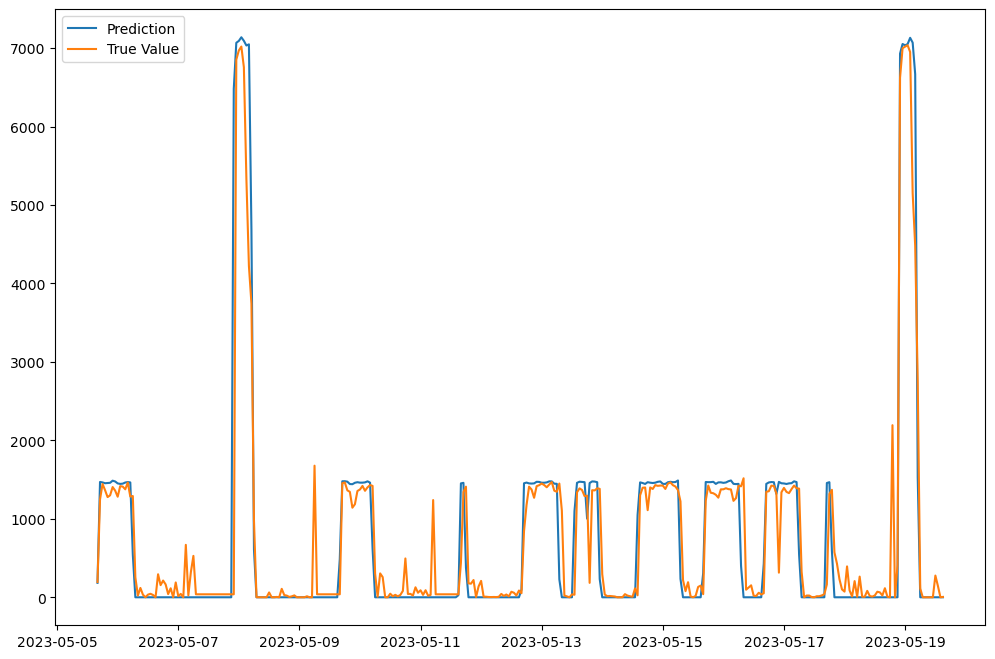

In [38]:
new_plot(test_actual, test_predict, df12_resampled, num_day=14)

### Decision Tree

In [108]:
from sklearn import tree

Dtree_reg = tree.DecisionTreeRegressor()
Dtree_reg = Dtree_reg.fit(X_train, y_train)


In [109]:
# Make Predictions
train_predict = Dtree_reg.predict(X_train) # prediction on train data
test_predict = Dtree_reg.predict(X_test) # prediction on test data
    
# reverse the scalar effect
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    
# Calculate RMSE
print("RMSE for Train dataset", calculate_rmse(train_actual, train_predict)) # rmse for train data
print("RMSE for Test dataset", calculate_rmse(test_actual, test_predict), '\n') # rmse for test data
    
# Calculate MAE
print("MAE for Train dataset", calculate_mae(train_actual, train_predict)) # mae for train data
print("MAE for Test dataset", calculate_mae(test_actual, test_predict)) # mae for test data

RMSE for Train dataset 122.19757865876137
RMSE for Test dataset 262.068033199733 

MAE for Train dataset 5.275251446588746
MAE for Test dataset 50.66040125038504


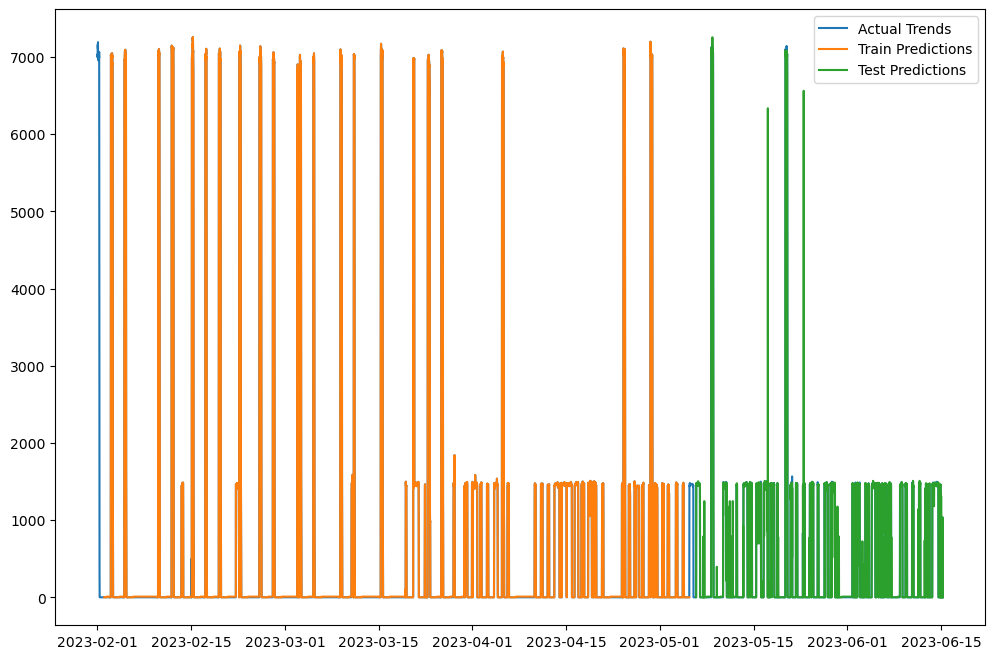

In [110]:
plot_predictions(df12_scaled, train_predict, test_predict, 96, scaler)

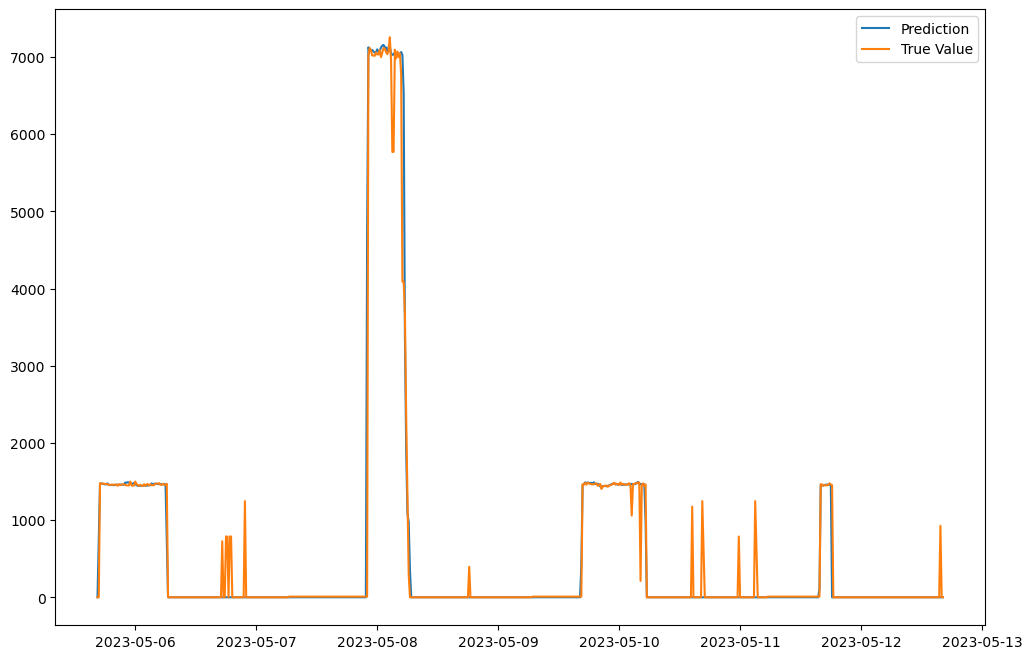

In [113]:
new_plot(test_actual, test_predict, df12_resampled, num_day=7)

### XGBoost Model

In [117]:
import xgboost as xgb

In [118]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
reg.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=20)

[0]	validation_0-rmse:0.33314	validation_1-rmse:0.31418
[20]	validation_0-rmse:0.03351	validation_1-rmse:0.03004
[40]	validation_0-rmse:0.02552	validation_1-rmse:0.03065
[60]	validation_0-rmse:0.02190	validation_1-rmse:0.03085
[68]	validation_0-rmse:0.02099	validation_1-rmse:0.03087


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [119]:
# Make Predictions
train_predict = reg.predict(X_train) # prediction on train data
test_predict = reg.predict(X_test) # prediction on test data
    
# reverse the scalar effect
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    
# Calculate RMSE
print("RMSE for Train dataset", calculate_rmse(train_actual, train_predict)) # rmse for train data
print("RMSE for Test dataset", calculate_rmse(test_actual, test_predict), '\n') # rmse for test data
    
# Calculate MAE
print("MAE for Train dataset", calculate_mae(train_actual, train_predict)) # mae for train data
print("MAE for Test dataset", calculate_mae(test_actual, test_predict)) # mae for test data

RMSE for Train dataset 256.566005648666
RMSE for Test dataset 216.38853987554867 

MAE for Train dataset 45.413381197546656
MAE for Test dataset 60.881336440546804


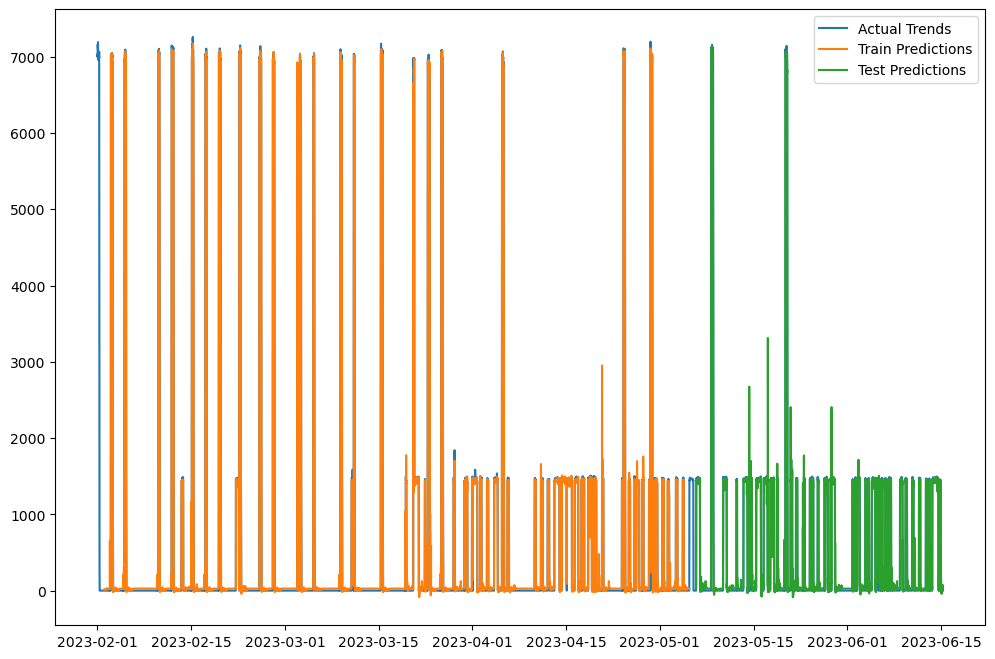

In [120]:
plot_predictions(df12_scaled, train_predict, test_predict, 96, scaler)

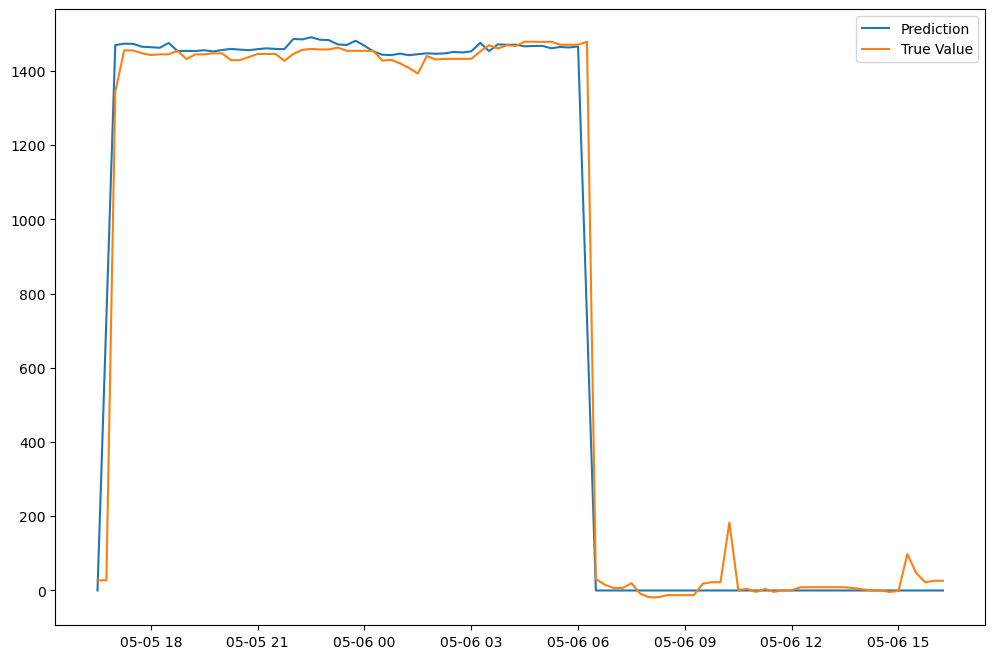

In [122]:
new_plot(test_actual, test_predict, df12_resampled, num_day=1)